In [9]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

pd.set_option('display.float_format', lambda x: '%.2f' % x)

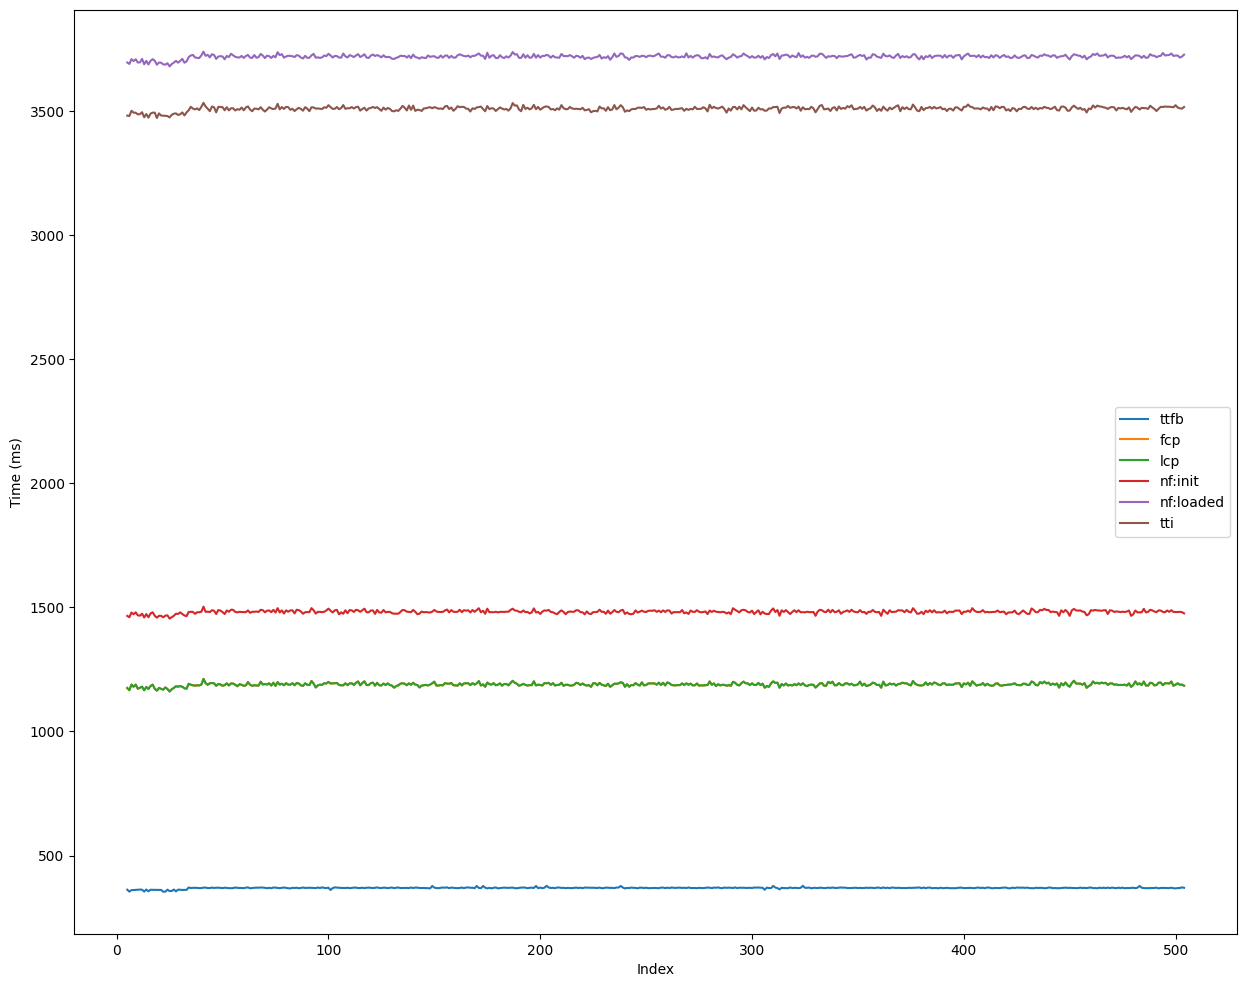

In [10]:
df = pd.read_csv('../../../../data/core-web-vitals/testrun-8/results-ssrh-throttled.csv', sep=',')

features = ['navTime', 'totalTime', 'lcp', 'fcp', 'ttfb', 'tbt', 'tti', 'longestTask', 'longTasks', 'nf:init', 'nf:config','nf:loaded']
target_features = ['ttfb', 'fcp', 'lcp',  'nf:init', 'nf:loaded', 'tti'] #

# Remove Java warmup
df = df.iloc[5:]

# Plotting the line graph for ttfb, fcp, and tti
plt.figure(figsize=(15, 12))
for t in target_features:
    plt.plot(df[t], label=t)

plt.xlabel('Index')
plt.ylabel('Time (ms)')
plt.legend()
plt.show()

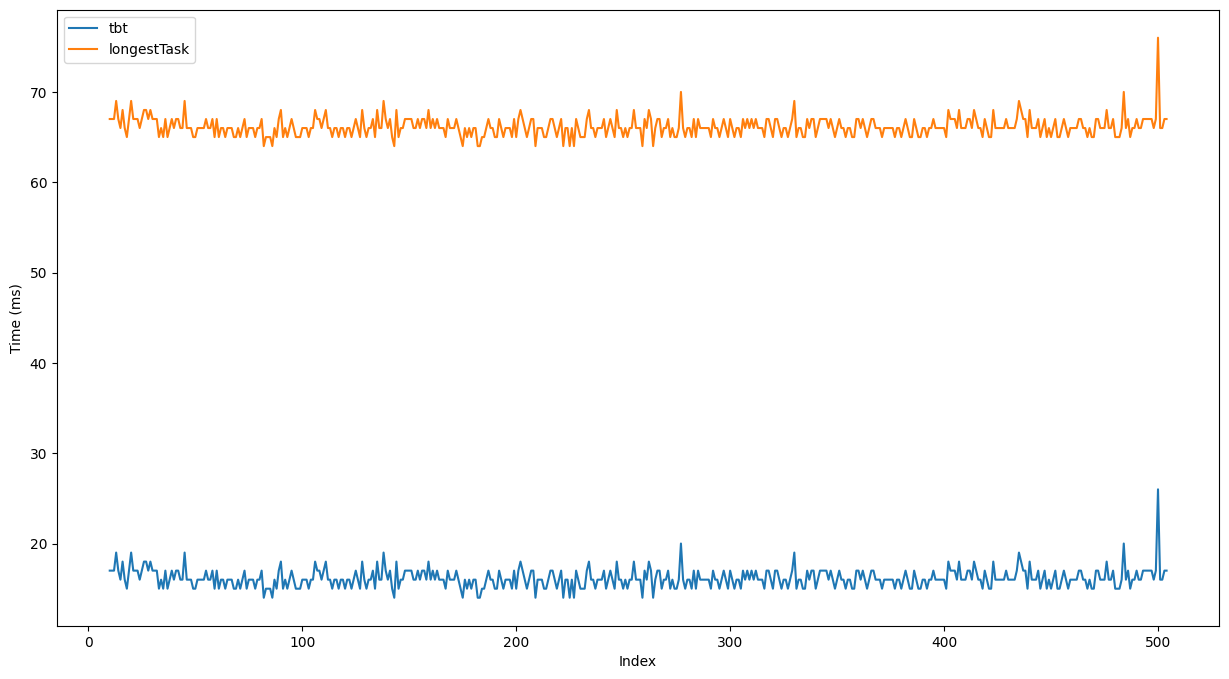

In [11]:

target_features = ['tbt', 'longestTask'] #

# Remove Java warmup
df = df.iloc[5:]

# Plotting the line graph for ttfb, fcp, and tti
plt.figure(figsize=(15, 8))
for t in target_features:
    plt.plot(df[t], label=t)

plt.xlabel('Index')
plt.ylabel('Time (ms)')
plt.legend()
plt.show()

In [12]:
features = ['navTime', 'totalTime', 'lcp', 'fcp', 'ttfb', 'tbt', 'tti', 'longestTask', 'longTasks', 'nf:init', 'nf:config','nf:loaded']
headers = ["feature","Tests", "min", "1st Qrt.", "mean", "median", "3rd Qrt.", "max", "std dev."] 
report = []

for f in features:
  report.append([
      f,
      df[f].size,
      df[f].min(),
      df[f].quantile(0.25),
      df[f].mean(),
      df[f].median(),
      df[f].quantile(0.75),
      df[f].max(),
      df[f].std(),
  ])

pd.DataFrame(report, columns=headers)

,feature,Tests,min,1st Qrt.,mean,median,3rd Qrt.,max,std dev.
0,navTime,495,321.00,335.00,335.39,336.00,337.00,344.00,2.72
1,totalTime,495,3477.00,3512.00,3514.93,3515.00,3521.00,3538.00,8.57
2,lcp,495,1160.80,1185.70,1189.30,1188.40,1193.90,1211.80,6.39
3,fcp,495,1160.80,1185.70,1189.30,1188.40,1193.90,1211.80,6.39
4,ttfb,495,354.30,368.90,369.42,369.60,370.60,378.00,2.66
5,tbt,495,14.00,16.00,16.15,16.00,17.00,26.00,1.05
6,tti,495,3471.70,3505.95,3509.19,3509.80,3515.10,3532.90,8.54
7,longestTask,495,64.00,66.00,66.15,66.00,67.00,76.00,1.05
8,longTasks,495,1.00,1.00,1.00,1.00,1.00,1.00,0.00
9,nf:init,495,1454.80,1479.90,1482.06,1481.70,1487.40,1502.80,6.63
